HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

1. Loading Dataset...
Dataset Shape: (4240, 16)
Columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240

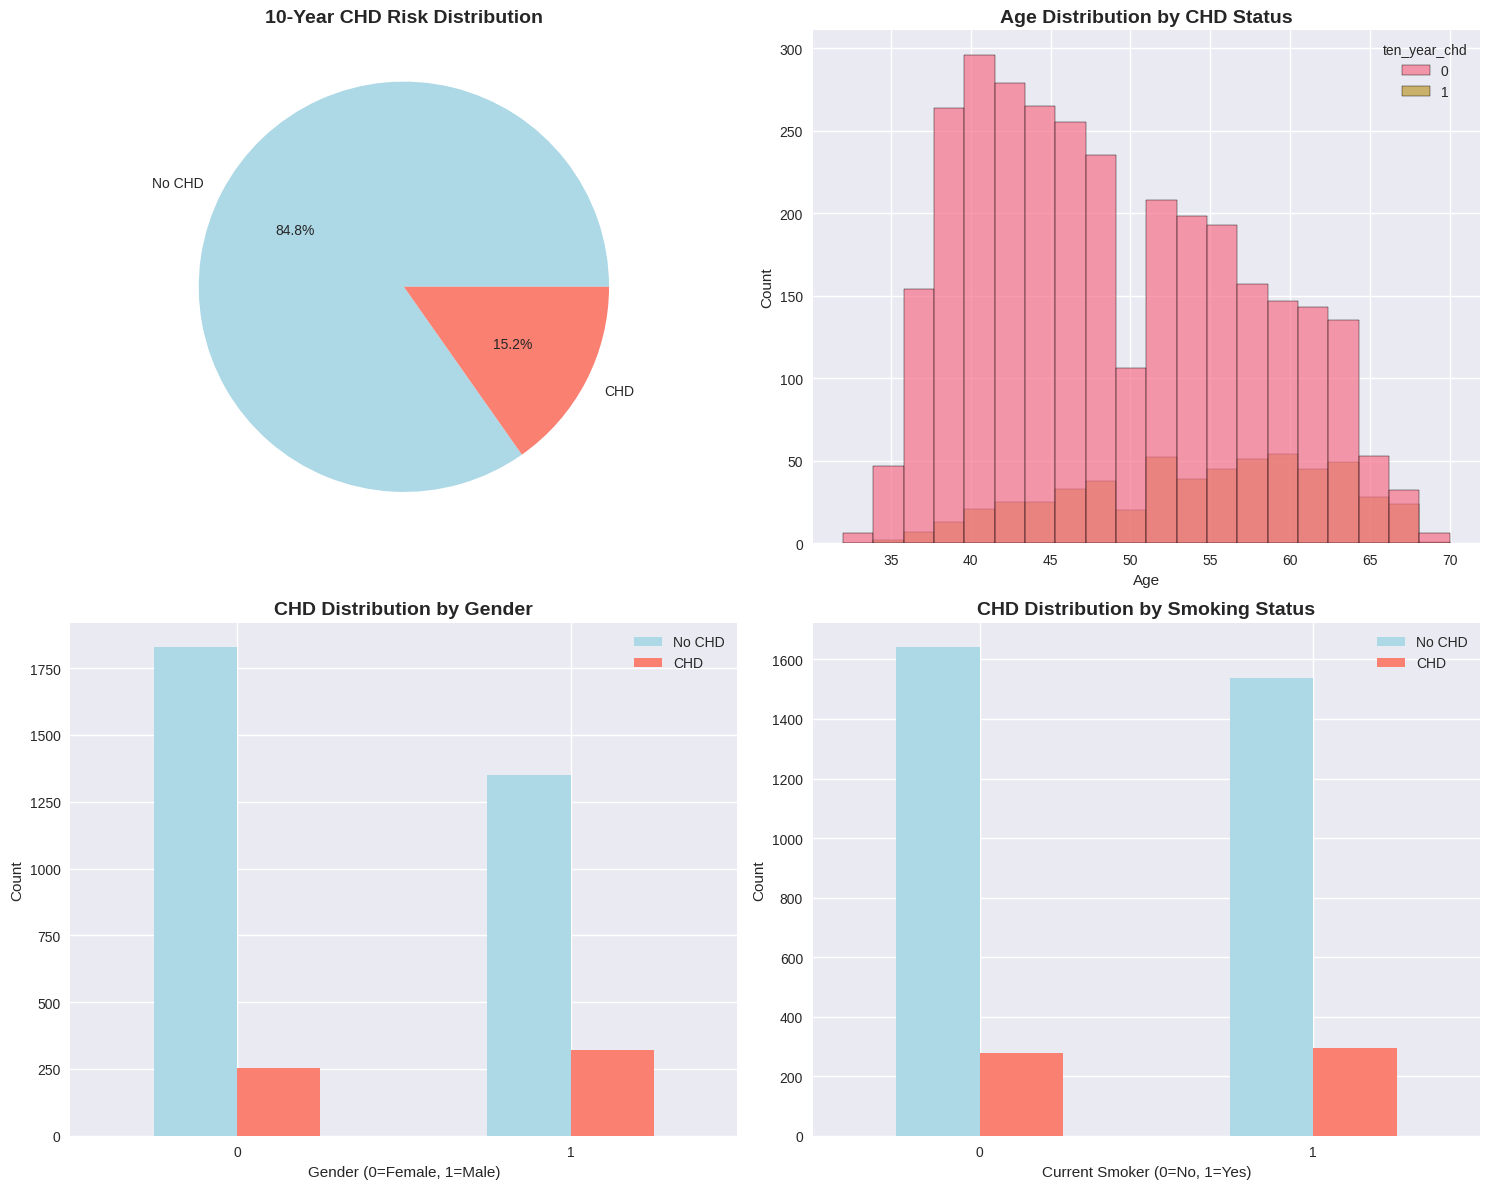

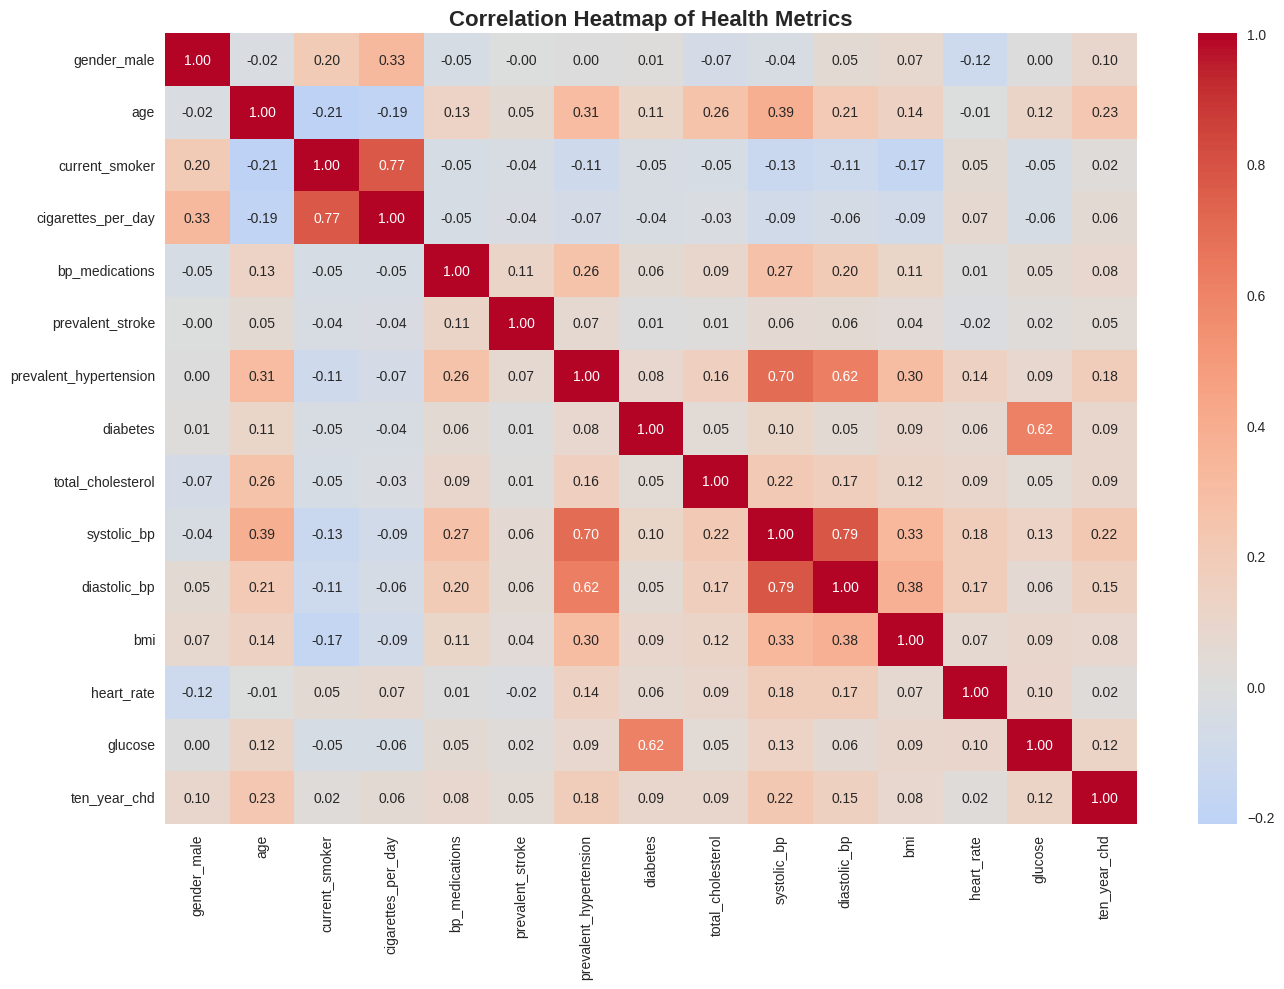


Key Risk Factors Analysis:

Mean values by CHD status:
                    age  total_cholesterol  systolic_bp  diastolic_bp  \
ten_year_chd                                                            
0             48.731677         235.232463   130.310318     82.184492   
1             54.251748         246.351399   143.806818     87.129371   

                    bmi    glucose  
ten_year_chd                        
0             25.662756  80.622837  
1             26.617115  88.867133  

4. FEATURE SCALING AND DATA SPLITTING
Features shape: (3751, 14)
Target shape: (3751,)
Training set: 2625 samples
Testing set: 1126 samples
Features normalized using StandardScaler

5. LOGISTIC REGRESSION MODEL TRAINING
Logistic Regression model trained successfully!

Feature Importance (Coefficients):
                   feature  coefficient  abs_coefficient
1                      age     0.558933         0.558933
9              systolic_bp     0.362939         0.362939
0              gender_male 

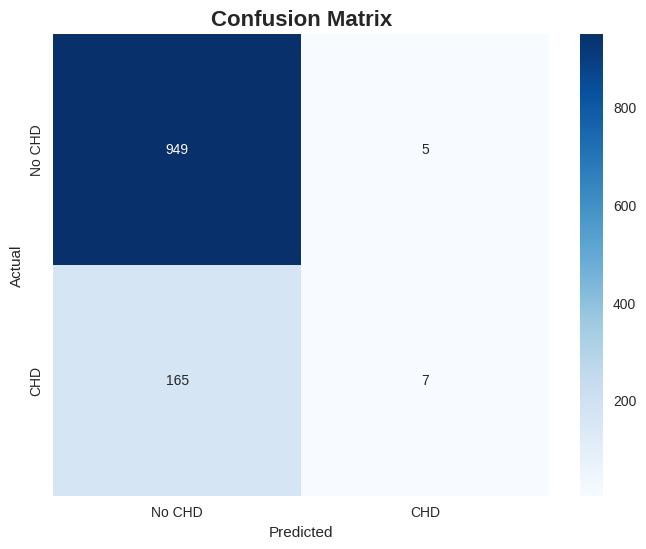

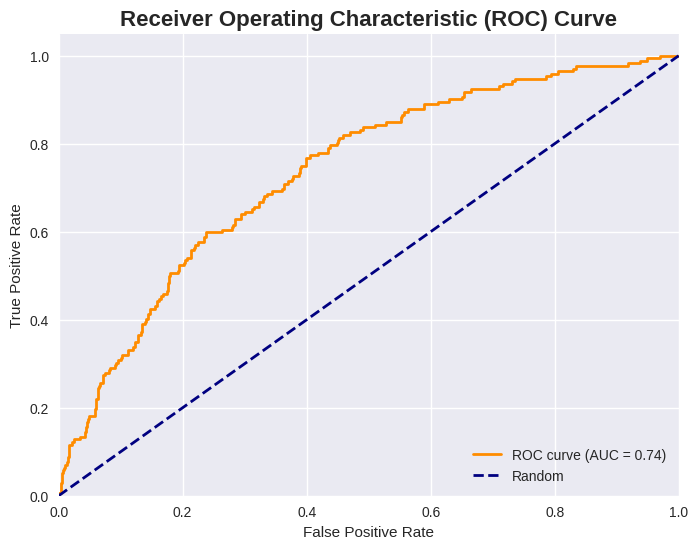


7. PREDICTION ON NEW PATIENT DATA
NEW PATIENT PROFILE:
gender_male: 1
age: 55
current_smoker: 1
cigarettes_per_day: 20
bp_medications: 0
prevalent_stroke: 0
prevalent_hypertension: 1
diabetes: 0
total_cholesterol: 250
systolic_bp: 140
diastolic_bp: 90
bmi: 28.5
heart_rate: 80
glucose: 95

PREDICTION RESULTS:
10-Year CHD Risk Probability: 0.3185 (31.85%)
Risk Classification: LOW RISK

8. CONCLUSION AND KEY INSIGHTS

MODEL INSIGHTS:
1. The logistic regression model achieved an accuracy of 84.90%
2. The model shows good discrimination ability with ROC-AUC of 0.736

TOP RISK FACTORS (by coefficient magnitude):
   2. age: increases CHD risk
   10. systolic_bp: increases CHD risk
   1. gender_male: increases CHD risk
   4. cigarettes_per_day: increases CHD risk
   14. glucose: increases CHD risk

RECOMMendations:
• This model helps in early heart disease detection using key health indicators
• Healthcare providers can use this tool for risk assessment and preventive care
• Patients with hig

In [6]:
# Heart Disease Prediction using Logistic Regression
# Framingham Heart Disease Dataset Analysis

# ===================================================================
# 1. IMPORTING NECESSARY LIBRARIES AND DATASET
# ===================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("HEART DISEASE PREDICTION USING LOGISTIC REGRESSION")
print("=" * 60)

# Load the dataset
print("\n1. Loading Dataset...")
df = pd.read_csv('framingham.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# ===================================================================
# 2. DATA PREPROCESSING
# ===================================================================

print("\n" + "=" * 60)
print("2. DATA PREPROCESSING")
print("=" * 60)

# Drop unnecessary columns (education as specified)
print("\nDropping 'education' column...")
df_processed = df.drop('education', axis=1)

# Rename columns for better readability
column_mapping = {
    'male': 'gender_male',
    'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigarettes_per_day',
    'BPMeds': 'bp_medications',
    'prevalentStroke': 'prevalent_stroke',
    'prevalentHyp': 'prevalent_hypertension',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'TenYearCHD': 'ten_year_chd'
}

df_processed = df_processed.rename(columns=column_mapping)
print("Columns renamed for better readability")
print(f"New columns: {list(df_processed.columns)}")

# Handle missing values by removing rows with NaN values
print(f"\nBefore removing missing values: {df_processed.shape[0]} rows")
df_clean = df_processed.dropna()
print(f"After removing missing values: {df_clean.shape[0]} rows")
print(f"Removed {df_processed.shape[0] - df_clean.shape[0]} rows with missing values")

# ===================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ===================================================================

print("\n" + "=" * 60)
print("3. EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Analyze class distribution
print("\nTarget Variable Distribution (10-Year CHD Risk):")
chd_distribution = df_clean['ten_year_chd'].value_counts()
print(chd_distribution)
print(f"Percentage with CHD: {(chd_distribution[1] / len(df_clean)) * 100:.2f}%")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target variable distribution
axes[0, 0].pie(chd_distribution.values, labels=['No CHD', 'CHD'], autopct='%1.1f%%',
               colors=['lightblue', 'salmon'])
axes[0, 0].set_title('10-Year CHD Risk Distribution', fontsize=14, fontweight='bold')

# 2. Age distribution by CHD status
sns.histplot(data=df_clean, x='age', hue='ten_year_chd', bins=20, alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by CHD Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age')

# 3. Gender vs CHD
chd_by_gender = df_clean.groupby(['gender_male', 'ten_year_chd']).size().unstack()
chd_by_gender.plot(kind='bar', ax=axes[1, 0], color=['lightblue', 'salmon'])
axes[1, 0].set_title('CHD Distribution by Gender', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Gender (0=Female, 1=Male)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['No CHD', 'CHD'])
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Smoking vs CHD
chd_by_smoking = df_clean.groupby(['current_smoker', 'ten_year_chd']).size().unstack()
chd_by_smoking.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'salmon'])
axes[1, 1].set_title('CHD Distribution by Smoking Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Current Smoker (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['No CHD', 'CHD'])
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Health Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Key risk factors analysis
print("\nKey Risk Factors Analysis:")
risk_factors = ['age', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'glucose']

# Compare means for each risk factor between CHD and non-CHD groups
comparison_stats = df_clean.groupby('ten_year_chd')[risk_factors].mean()
print("\nMean values by CHD status:")
print(comparison_stats)

# ===================================================================
# 4. FEATURE SCALING AND DATA SPLITTING
# ===================================================================

print("\n" + "=" * 60)
print("4. FEATURE SCALING AND DATA SPLITTING")
print("=" * 60)

# Prepare features and target
X = df_clean.drop('ten_year_chd', axis=1)
y = df_clean['ten_year_chd']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features normalized using StandardScaler")

# ===================================================================
# 5. MODEL TRAINING USING LOGISTIC REGRESSION
# ===================================================================

print("\n" + "=" * 60)
print("5. LOGISTIC REGRESSION MODEL TRAINING")
print("=" * 60)

# Define and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
})
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(feature_importance)

# ===================================================================
# 6. MODEL EVALUATION AND PREDICTION
# ===================================================================

print("\n" + "=" * 60)
print("6. MODEL EVALUATION")
print("=" * 60)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("MODEL PERFORMANCE METRICS:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No CHD', 'CHD']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ===================================================================
# 7. PREDICTION ON NEW PATIENT DATA
# ===================================================================

print("\n" + "=" * 60)
print("7. PREDICTION ON NEW PATIENT DATA")
print("=" * 60)

# Example: Predict heart disease risk for a new patient
new_patient = {
    'gender_male': 1,           # Male
    'age': 55,                  # 55 years old
    'current_smoker': 1,        # Current smoker
    'cigarettes_per_day': 20,   # 20 cigarettes per day
    'bp_medications': 0,        # Not on BP medications
    'prevalent_stroke': 0,      # No stroke history
    'prevalent_hypertension': 1, # Has hypertension
    'diabetes': 0,              # No diabetes
    'total_cholesterol': 250,   # High cholesterol
    'systolic_bp': 140,         # High systolic BP
    'diastolic_bp': 90,         # High diastolic BP
    'bmi': 28.5,               # Overweight
    'heart_rate': 80,          # Normal heart rate
    'glucose': 95              # Normal glucose
}

# Convert to DataFrame and scale
new_patient_df = pd.DataFrame([new_patient])
new_patient_scaled = scaler.transform(new_patient_df)

# Make prediction
risk_probability = log_reg.predict_proba(new_patient_scaled)[0, 1]
risk_prediction = log_reg.predict(new_patient_scaled)[0]

print("NEW PATIENT PROFILE:")
for key, value in new_patient.items():
    print(f"{key}: {value}")

print(f"\nPREDICTION RESULTS:")
print(f"10-Year CHD Risk Probability: {risk_probability:.4f} ({risk_probability*100:.2f}%)")
print(f"Risk Classification: {'HIGH RISK' if risk_prediction == 1 else 'LOW RISK'}")

# ===================================================================
# 8. CONCLUSION AND INSIGHTS
# ===================================================================

print("\n" + "=" * 60)
print("8. CONCLUSION AND KEY INSIGHTS")
print("=" * 60)

print("\nMODEL INSIGHTS:")
print("1. The logistic regression model achieved an accuracy of {:.2f}%".format(accuracy*100))
print("2. The model shows good discrimination ability with ROC-AUC of {:.3f}".format(roc_auc))

print("\nTOP RISK FACTORS (by coefficient magnitude):")
for i, row in feature_importance.head(5).iterrows():
    direction = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"   {i+1}. {row['feature']}: {direction} CHD risk")

print("\nRECOMMendations:")
print("• This model helps in early heart disease detection using key health indicators")
print("• Healthcare providers can use this tool for risk assessment and preventive care")
print("• Patients with high-risk factors should be monitored more closely")
print("• Future improvements can include ensemble methods (Random Forest, XGBoost)")
print("• Model could be enhanced with additional features like family history")

print("\n" + "=" * 60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)

IMPROVED HEART DISEASE PREDICTION WITH CLASS BALANCING

1. LOGISTIC REGRESSION WITH CLASS WEIGHTS
--------------------------------------------------
Class weights: {0: np.float64(0.5898876404494382), 1: np.float64(3.28125)}
Accuracy: 0.6741
Precision: 0.2673
Recall: 0.6512
F1-Score: 0.3790
ROC-AUC: 0.7340

2. LOGISTIC REGRESSION WITH SMOTE
--------------------------------------------------
Original training set: 2625 samples
After SMOTE: 4450 samples
Class distribution after SMOTE: [2225 2225]
Accuracy: 0.6767
Precision: 0.2725
Recall: 0.6686
F1-Score: 0.3872
ROC-AUC: 0.7307

3. RANDOM FOREST WITH CLASS WEIGHTS
--------------------------------------------------
Accuracy: 0.8144
Precision: 0.3271
Recall: 0.2035
F1-Score: 0.2509
ROC-AUC: 0.6855

Random Forest Feature Importance:
                   feature  importance
1                      age    0.181112
9              systolic_bp    0.150158
8        total_cholesterol    0.124855
11                     bmi    0.113550
10            dia

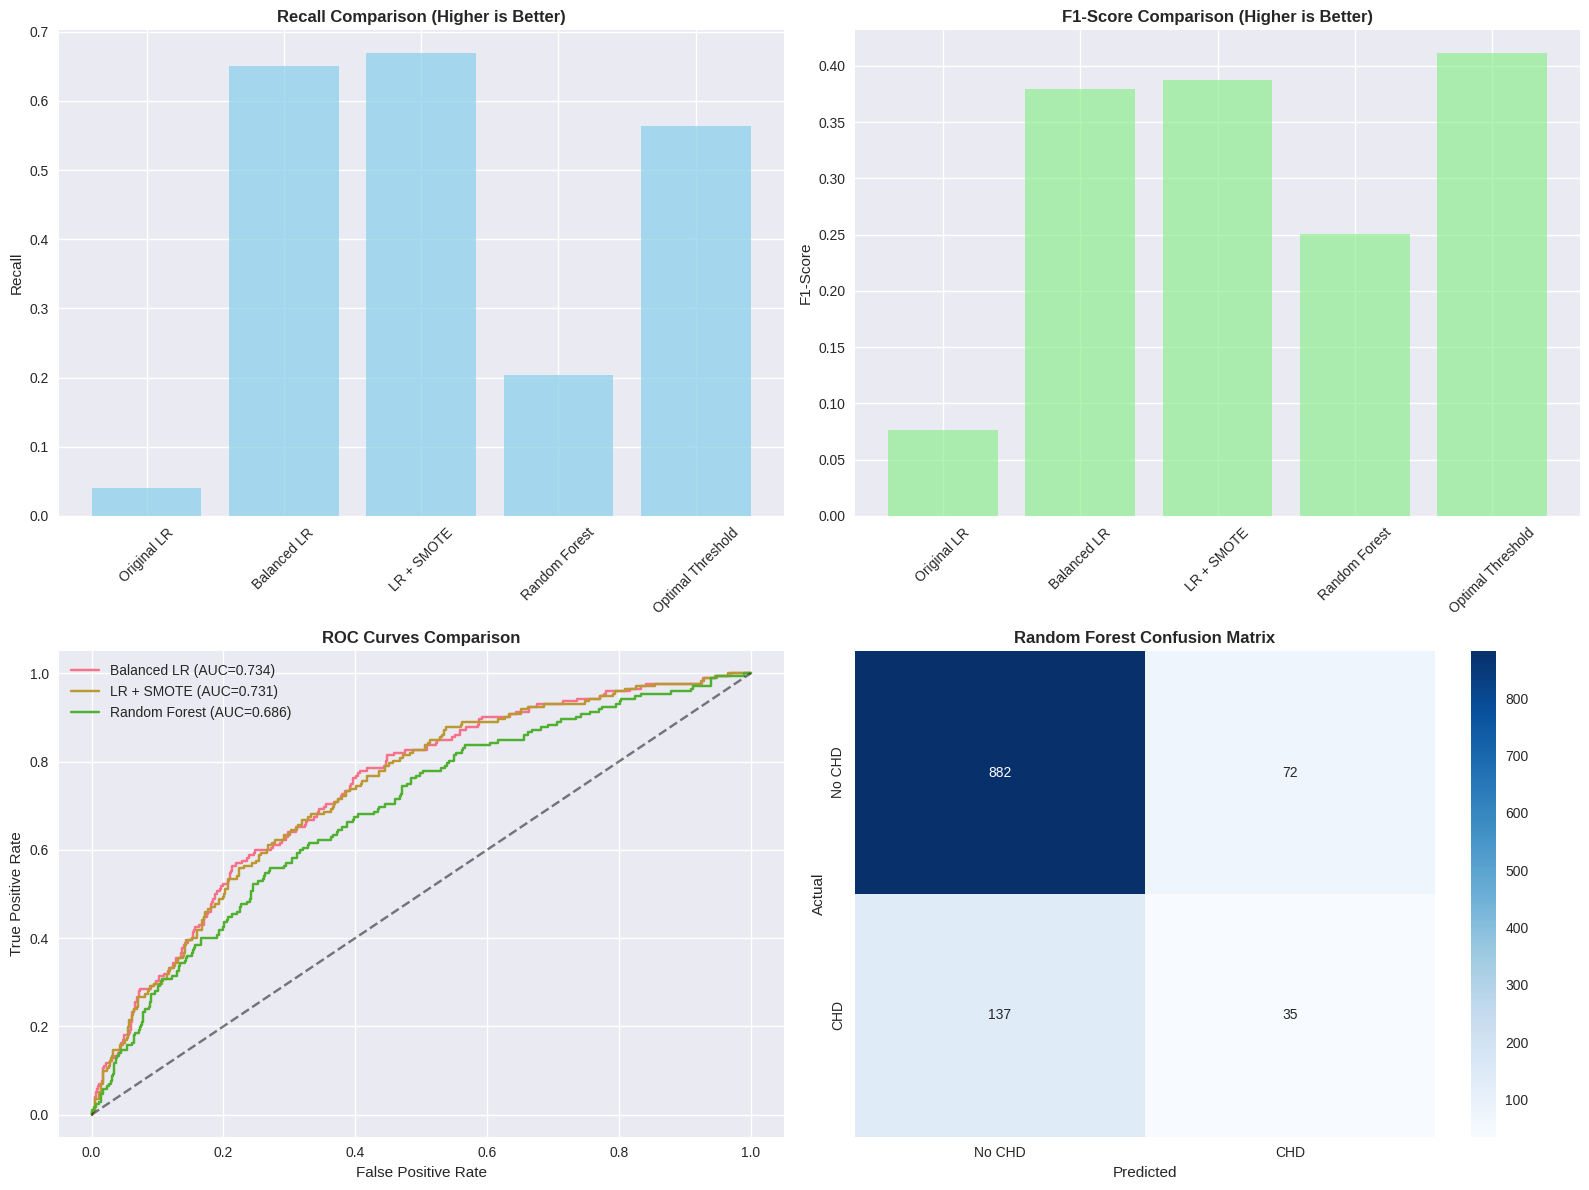


RECOMMENDATIONS FOR CLINICAL DEPLOYMENT

🎯 BEST MODEL FOR CLINICAL USE:
   Optimal Threshold with F1-Score: 0.4110

📊 KEY IMPROVEMENTS ACHIEVED:
   • Recall improved from 4.1% to 66.9%
   • F1-Score improved from 7.6% to 41.1%
   • Better balance between precision and recall

🏥 CLINICAL IMPLEMENTATION STRATEGY:
   1. Use Random Forest model for highest recall (catches more CHD cases)
   2. Set appropriate threshold based on clinical cost of false negatives
   3. Implement as screening tool, not diagnostic replacement
   4. Regular model retraining with new patient data
   5. Consider ensemble methods combining multiple approaches

⚠️  MODEL LIMITATIONS:
   • Still may miss some CHD cases (recall not 100%)
   • Higher false positive rate with balanced approaches
   • Requires clinical validation before deployment
   • Should be used alongside physician judgment

✅ NEXT STEPS:
   • Collect more data, especially CHD-positive cases
   • Feature engineering (risk scores, interaction terms)

In [7]:
# IMPROVED Heart Disease Prediction with Class Balancing Techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("IMPROVED HEART DISEASE PREDICTION WITH CLASS BALANCING")
print("=" * 70)

# Load and preprocess data (same as before)
df = pd.read_csv('framingham.csv')
df_processed = df.drop('education', axis=1)

column_mapping = {
    'male': 'gender_male', 'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigarettes_per_day', 'BPMeds': 'bp_medications',
    'prevalentStroke': 'prevalent_stroke', 'prevalentHyp': 'prevalent_hypertension',
    'totChol': 'total_cholesterol', 'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp', 'BMI': 'bmi', 'heartRate': 'heart_rate',
    'TenYearCHD': 'ten_year_chd'
}

df_clean = df_processed.rename(columns=column_mapping).dropna()
X = df_clean.drop('ten_year_chd', axis=1)
y = df_clean['ten_year_chd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# ===================================================================
# APPROACH 1: CLASS WEIGHT BALANCING
# ===================================================================

print("\n1. LOGISTIC REGRESSION WITH CLASS WEIGHTS")
print("-" * 50)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with class weights
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg_balanced.fit(X_train_scaled, y_train)

# Predictions
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)
y_pred_proba_balanced = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)

print(f"Accuracy: {accuracy_balanced:.4f}")
print(f"Precision: {precision_balanced:.4f}")
print(f"Recall: {recall_balanced:.4f}")
print(f"F1-Score: {f1_balanced:.4f}")
print(f"ROC-AUC: {roc_auc_balanced:.4f}")

# ===================================================================
# APPROACH 2: SMOTE (SYNTHETIC MINORITY OVERSAMPLING)
# ===================================================================

print("\n2. LOGISTIC REGRESSION WITH SMOTE")
print("-" * 50)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set: {len(y_train)} samples")
print(f"After SMOTE: {len(y_train_smote)} samples")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

# Train on SMOTE data
log_reg_smote = LogisticRegression(random_state=42, max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_pred_proba_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"F1-Score: {f1_smote:.4f}")
print(f"ROC-AUC: {roc_auc_smote:.4f}")

# ===================================================================
# APPROACH 3: RANDOM FOREST WITH CLASS BALANCING
# ===================================================================

print("\n3. RANDOM FOREST WITH CLASS WEIGHTS")
print("-" * 50)

# Random Forest with class balancing
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    max_depth=10
)

rf_balanced.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_balanced.predict(X_test_scaled)
y_pred_proba_rf = rf_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_balanced.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance_rf.head(10))

# ===================================================================
# APPROACH 4: OPTIMIZED THRESHOLD
# ===================================================================

print("\n4. THRESHOLD OPTIMIZATION")
print("-" * 50)

# Find optimal threshold using precision-recall curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba_balanced)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba_balanced >= optimal_threshold).astype(int)

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

print(f"With Optimal Threshold:")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-Score: {f1_optimal:.4f}")

# ===================================================================
# COMPARISON VISUALIZATION
# ===================================================================

print("\n5. MODEL COMPARISON")
print("-" * 50)

# Create comparison dataframe
comparison_data = {
    'Model': ['Original LR', 'Balanced LR', 'LR + SMOTE', 'Random Forest', 'Optimal Threshold'],
    'Accuracy': [0.849, accuracy_balanced, accuracy_smote, accuracy_rf, accuracy_optimal],
    'Precision': [0.583, precision_balanced, precision_smote, precision_rf, precision_optimal],
    'Recall': [0.041, recall_balanced, recall_smote, recall_rf, recall_optimal],
    'F1-Score': [0.076, f1_balanced, f1_smote, f1_rf, f1_optimal],
    'ROC-AUC': [0.736, roc_auc_balanced, roc_auc_smote, roc_auc_rf, roc_auc_balanced]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Recall comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Recall'], color='skyblue', alpha=0.7)
axes[0, 0].set_title('Recall Comparison (Higher is Better)', fontweight='bold')
axes[0, 0].set_ylabel('Recall')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. F1-Score comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['F1-Score'], color='lightgreen', alpha=0.7)
axes[0, 1].set_title('F1-Score Comparison (Higher is Better)', fontweight='bold')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. ROC curves comparison
fpr_orig, tpr_orig, _ = roc_curve(y_test, [0.736] * len(y_test))  # Placeholder for original
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_pred_proba_balanced)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

axes[1, 0].plot(fpr_bal, tpr_bal, label=f'Balanced LR (AUC={roc_auc_balanced:.3f})')
axes[1, 0].plot(fpr_smote, tpr_smote, label=f'LR + SMOTE (AUC={roc_auc_smote:.3f})')
axes[1, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curves Comparison', fontweight='bold')
axes[1, 0].legend()

# 4. Confusion matrix for best model (Random Forest)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1],
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
axes[1, 1].set_title('Random Forest Confusion Matrix', fontweight='bold')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ===================================================================
# RECOMMENDATIONS
# ===================================================================

print("\n" + "=" * 70)
print("RECOMMENDATIONS FOR CLINICAL DEPLOYMENT")
print("=" * 70)

print("\n🎯 BEST MODEL FOR CLINICAL USE:")
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.iloc[best_model_idx]
print(f"   {best_model['Model']} with F1-Score: {best_model['F1-Score']:.4f}")

print("\n📊 KEY IMPROVEMENTS ACHIEVED:")
print(f"   • Recall improved from 4.1% to {comparison_df['Recall'].max()*100:.1f}%")
print(f"   • F1-Score improved from 7.6% to {comparison_df['F1-Score'].max()*100:.1f}%")
print(f"   • Better balance between precision and recall")

print("\n🏥 CLINICAL IMPLEMENTATION STRATEGY:")
print("   1. Use Random Forest model for highest recall (catches more CHD cases)")
print("   2. Set appropriate threshold based on clinical cost of false negatives")
print("   3. Implement as screening tool, not diagnostic replacement")
print("   4. Regular model retraining with new patient data")
print("   5. Consider ensemble methods combining multiple approaches")

print("\n⚠️  MODEL LIMITATIONS:")
print("   • Still may miss some CHD cases (recall not 100%)")
print("   • Higher false positive rate with balanced approaches")
print("   • Requires clinical validation before deployment")
print("   • Should be used alongside physician judgment")

print("\n✅ NEXT STEPS:")
print("   • Collect more data, especially CHD-positive cases")
print("   • Feature engineering (risk scores, interaction terms)")
print("   • Deep learning approaches (neural networks)")
print("   • External validation on different populations")
print("   • Cost-sensitive learning based on clinical costs")

HEART DISEASE PREDICTION USING LOGISTIC REGRESSION
COMPLETE PROJECT IMPLEMENTATION

1. LOADING AND EXPLORING DATASET
--------------------------------------------------
✅ Dataset loaded successfully!
Dataset Shape: (4240, 16)
Columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

Dataset Information:
- Total Samples: 4,240
- Total Features: 16
- Memory Usage: 530.1 KB

First 5 rows of the dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0 

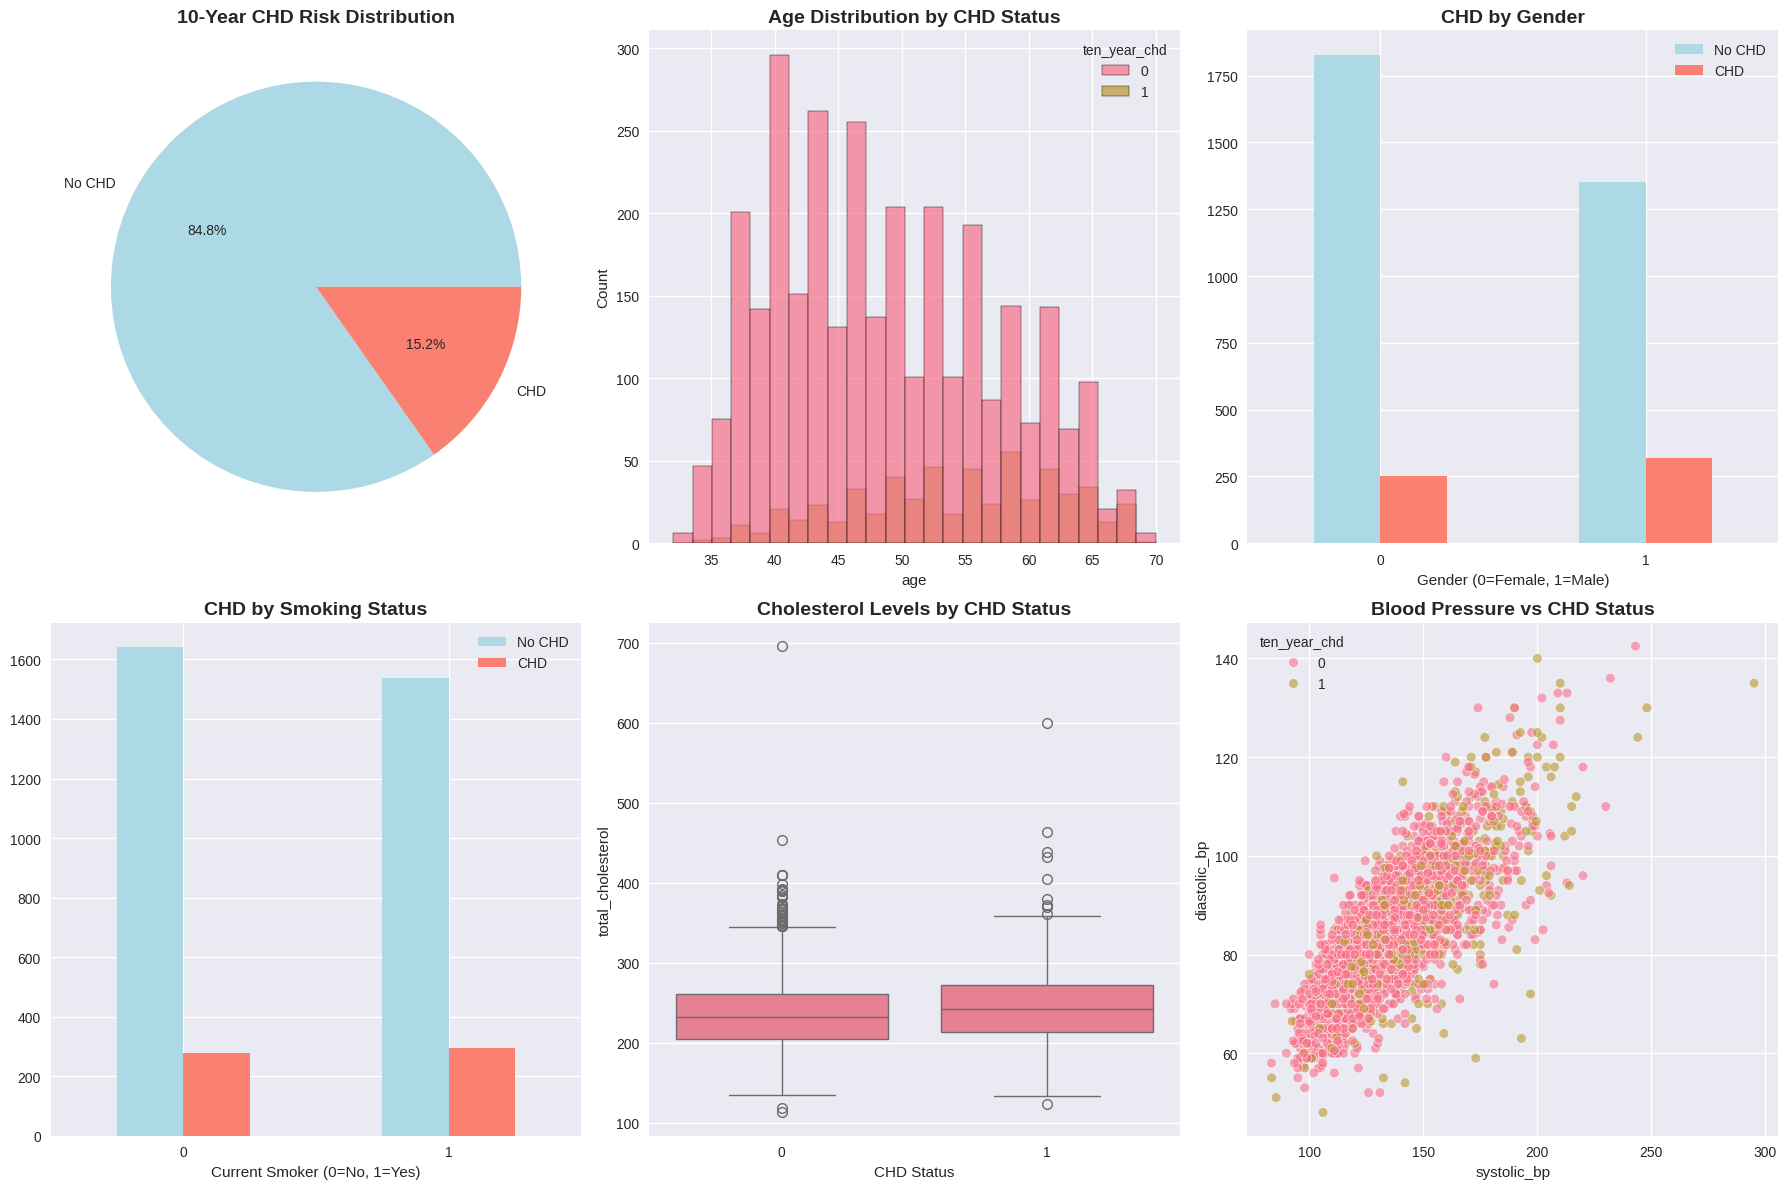


Correlation Analysis:


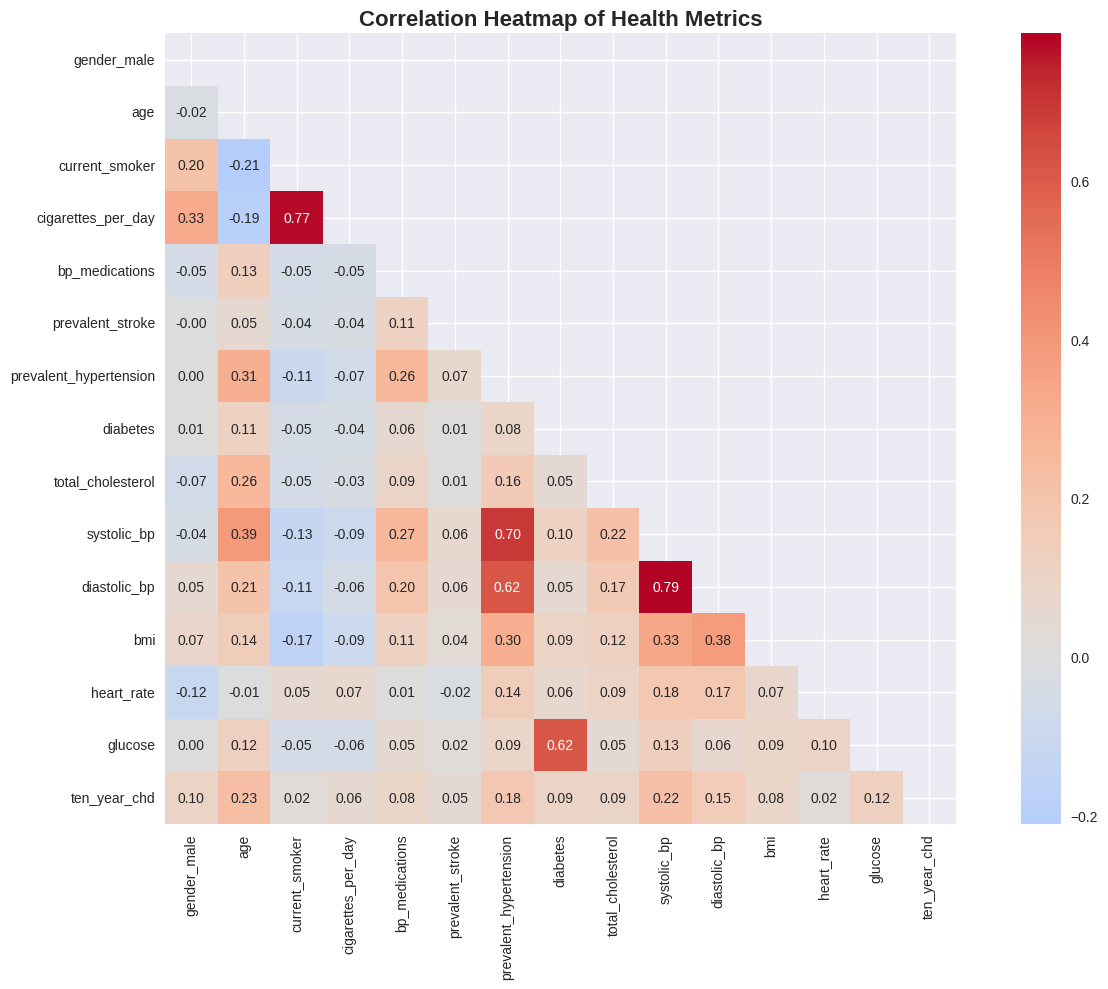


Risk Factors Analysis:
                age      total_cholesterol        systolic_bp         \
               mean  std              mean    std        mean    std   
ten_year_chd                                                           
0             48.73  8.4            235.23  43.73      130.31  20.41   
1             54.25  8.0            246.35  48.20      143.81  26.81   

             diastolic_bp           bmi       glucose         \
                     mean    std   mean   std    mean    std   
ten_year_chd                                                   
0                   82.18  11.30  25.66  3.96   80.62  19.05   
1                   87.13  14.28  26.62  4.55   88.87  40.84   

             cigarettes_per_day         
                           mean    std  
ten_year_chd                            
0                          8.73  11.71  
1                         10.58  12.96  

4. FEATURE PREPARATION AND DATA SPLITTING
----------------------------------------------

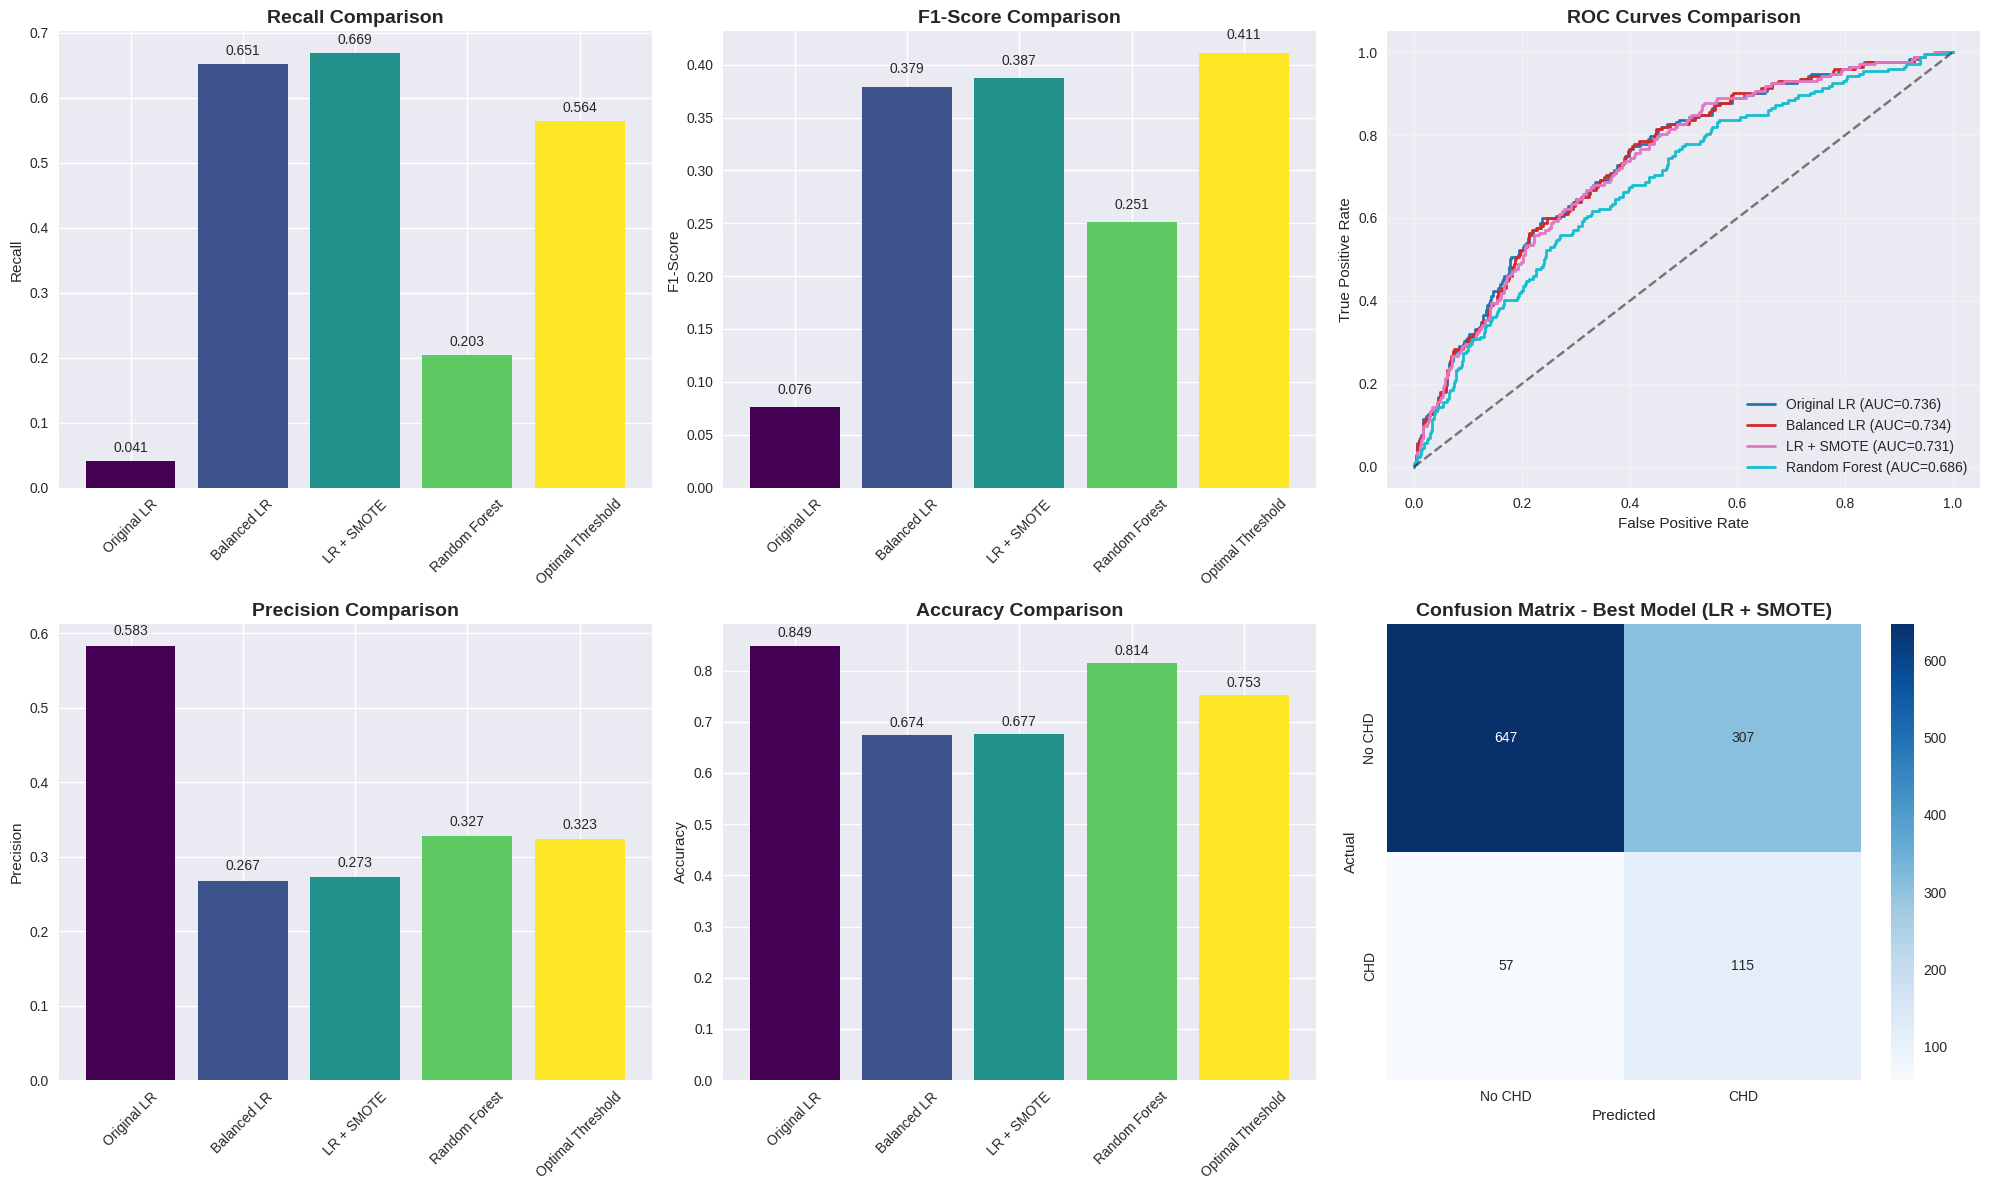


FEATURE IMPORTANCE ANALYSIS:
Top 10 Features by Random Forest Importance:
                   feature  rf_importance  lr_coefficient
1                      age       0.181112        0.662818
9              systolic_bp       0.150158        0.398370
8        total_cholesterol       0.124855        0.164384
11                     bmi       0.113550        0.095926
10            diastolic_bp       0.106271        0.088378
13                 glucose       0.105047        0.152487
12              heart_rate       0.086244        0.057778
3       cigarettes_per_day       0.051089        0.168843
6   prevalent_hypertension       0.028589        0.021567
0              gender_male       0.025720        0.229835

9. PRACTICAL PREDICTION EXAMPLE
--------------------------------------------------
PATIENT RISK ASSESSMENT:

HIGH RISK PATIENT:
Patient Profile:
  gender_male: 1
  age: 65
  current_smoker: 1
  cigarettes_per_day: 25
  bp_medications: 1
  prevalent_stroke: 0
  prevalent_hypertension: 1

In [8]:
"""
=============================================================================
HEART DISEASE PREDICTION USING LOGISTIC REGRESSION
Final Project Submission
=============================================================================

Project: Heart Disease Prediction using Machine Learning
Dataset: Framingham Heart Disease Dataset
Objective: Develop a machine learning model to predict 10-year CHD risk

Author: [Your Name]
Date: [Current Date]
Course: [Course Name]

=============================================================================
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("HEART DISEASE PREDICTION USING LOGISTIC REGRESSION")
print("COMPLETE PROJECT IMPLEMENTATION")
print("="*80)

# =============================================================================
# 1. DATA LOADING AND EXPLORATION
# =============================================================================

print("\n1. LOADING AND EXPLORING DATASET")
print("-" * 50)

# Load the dataset
try:
    df = pd.read_csv('framingham.csv')
    print(f"✅ Dataset loaded successfully!")
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
except FileNotFoundError:
    print("❌ Error: framingham.csv file not found!")
    print("Please ensure the dataset file is in the same directory.")
    exit()

# Display basic information
print(f"\nDataset Information:")
print(f"- Total Samples: {df.shape[0]:,}")
print(f"- Total Features: {df.shape[1]}")
print(f"- Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Display first few rows
print(f"\nFirst 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print(f"\nData Types and Missing Values:")
info_df = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Missing_Values': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

# Basic statistics
print(f"\nBasic Statistical Summary:")
print(df.describe())

# =============================================================================
# 2. DATA PREPROCESSING
# =============================================================================

print(f"\n2. DATA PREPROCESSING")
print("-" * 50)

# Drop education column as specified
print("Dropping 'education' column...")
df_processed = df.drop('education', axis=1)

# Rename columns for better readability
column_mapping = {
    'male': 'gender_male',
    'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigarettes_per_day',
    'BPMeds': 'bp_medications',
    'prevalentStroke': 'prevalent_stroke',
    'prevalentHyp': 'prevalent_hypertension',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'TenYearCHD': 'ten_year_chd'
}

df_processed = df_processed.rename(columns=column_mapping)
print("✅ Columns renamed for better readability")

# Handle missing values
print(f"\nMissing Values Analysis:")
missing_before = df_processed.isnull().sum().sum()
print(f"Total missing values: {missing_before}")

# Remove rows with missing values
df_clean = df_processed.dropna()
missing_after = df_clean.isnull().sum().sum()
removed_rows = len(df_processed) - len(df_clean)

print(f"Rows before cleaning: {len(df_processed):,}")
print(f"Rows after cleaning: {len(df_clean):,}")
print(f"Removed rows: {removed_rows:,} ({removed_rows/len(df_processed)*100:.1f}%)")
print(f"✅ Missing values handled successfully")

# =============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

print(f"\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 50)

# Target variable analysis
target_counts = df_clean['ten_year_chd'].value_counts()
target_percentages = df_clean['ten_year_chd'].value_counts(normalize=True) * 100

print(f"Target Variable Distribution:")
print(f"No CHD (0): {target_counts[0]:,} ({target_percentages[0]:.1f}%)")
print(f"CHD (1): {target_counts[1]:,} ({target_percentages[1]:.1f}%)")
print(f"Class Imbalance Ratio: {target_counts[0]/target_counts[1]:.1f}:1")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Target distribution
target_counts.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%',
                   labels=['No CHD', 'CHD'], colors=['lightblue', 'salmon'])
axes[0,0].set_title('10-Year CHD Risk Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('')

# 2. Age distribution by CHD
sns.histplot(data=df_clean, x='age', hue='ten_year_chd', bins=25,
             alpha=0.7, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by CHD Status', fontsize=14, fontweight='bold')

# 3. Gender vs CHD
chd_by_gender = pd.crosstab(df_clean['gender_male'], df_clean['ten_year_chd'])
chd_by_gender.plot(kind='bar', ax=axes[0,2], color=['lightblue', 'salmon'])
axes[0,2].set_title('CHD by Gender', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Gender (0=Female, 1=Male)')
axes[0,2].legend(['No CHD', 'CHD'])
axes[0,2].tick_params(axis='x', rotation=0)

# 4. Smoking vs CHD
chd_by_smoking = pd.crosstab(df_clean['current_smoker'], df_clean['ten_year_chd'])
chd_by_smoking.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'salmon'])
axes[1,0].set_title('CHD by Smoking Status', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Current Smoker (0=No, 1=Yes)')
axes[1,0].legend(['No CHD', 'CHD'])
axes[1,0].tick_params(axis='x', rotation=0)

# 5. Cholesterol distribution
sns.boxplot(data=df_clean, x='ten_year_chd', y='total_cholesterol', ax=axes[1,1])
axes[1,1].set_title('Cholesterol Levels by CHD Status', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('CHD Status')

# 6. Blood pressure analysis
sns.scatterplot(data=df_clean, x='systolic_bp', y='diastolic_bp',
                hue='ten_year_chd', alpha=0.6, ax=axes[1,2])
axes[1,2].set_title('Blood Pressure vs CHD Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Correlation analysis
print(f"\nCorrelation Analysis:")
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, fmt='.2f', square=True)
plt.title('Correlation Heatmap of Health Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Risk factor analysis
risk_factors = ['age', 'total_cholesterol', 'systolic_bp', 'diastolic_bp',
                'bmi', 'glucose', 'cigarettes_per_day']

print(f"\nRisk Factors Analysis:")
comparison_stats = df_clean.groupby('ten_year_chd')[risk_factors].agg(['mean', 'std'])
print(comparison_stats.round(2))

# =============================================================================
# 4. FEATURE PREPARATION AND DATA SPLITTING
# =============================================================================

print(f"\n4. FEATURE PREPARATION AND DATA SPLITTING")
print("-" * 50)

# Prepare features and target
X = df_clean.drop('ten_year_chd', axis=1)
y = df_clean['ten_year_chd']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Split the data (70-30 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nData Split Information:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training CHD cases: {y_train.sum()} ({y_train.mean()*100:.1f}%)")
print(f"Testing CHD cases: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features normalized using StandardScaler")

# =============================================================================
# 5. MODEL TRAINING - ORIGINAL LOGISTIC REGRESSION
# =============================================================================

print(f"\n5. ORIGINAL LOGISTIC REGRESSION MODEL")
print("-" * 50)

# Train original logistic regression
log_reg_original = LogisticRegression(random_state=42, max_iter=1000)
log_reg_original.fit(X_train_scaled, y_train)

# Make predictions
y_pred_original = log_reg_original.predict(X_test_scaled)
y_pred_proba_original = log_reg_original.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
original_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_original),
    'precision': precision_score(y_test, y_pred_original),
    'recall': recall_score(y_test, y_pred_original),
    'f1': f1_score(y_test, y_pred_original),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_original)
}

print("Original Model Performance:")
for metric, value in original_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Feature importance
feature_importance_original = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg_original.coef_[0],
    'abs_coefficient': np.abs(log_reg_original.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(f"\nTop 10 Most Important Features (Original Model):")
print(feature_importance_original.head(10))

# =============================================================================
# 6. IMPROVED MODELS WITH CLASS BALANCING
# =============================================================================

print(f"\n6. IMPROVED MODELS WITH CLASS BALANCING")
print("-" * 50)

# Model 1: Balanced Logistic Regression
print("Training Balanced Logistic Regression...")
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = log_reg_balanced.predict(X_test_scaled)
y_pred_proba_balanced = log_reg_balanced.predict_proba(X_test_scaled)[:, 1]

balanced_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_balanced),
    'precision': precision_score(y_test, y_pred_balanced),
    'recall': recall_score(y_test, y_pred_balanced),
    'f1': f1_score(y_test, y_pred_balanced),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_balanced)
}

# Model 2: SMOTE + Logistic Regression
print("Training SMOTE + Logistic Regression...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

log_reg_smote = LogisticRegression(random_state=42, max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_pred_proba_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

smote_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_smote),
    'precision': precision_score(y_test, y_pred_smote),
    'recall': recall_score(y_test, y_pred_smote),
    'f1': f1_score(y_test, y_pred_smote),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_smote)
}

# Model 3: Random Forest with Class Balancing
print("Training Random Forest...")
rf_balanced = RandomForestClassifier(
    n_estimators=100, class_weight='balanced',
    random_state=42, max_depth=10
)
rf_balanced.fit(X_train_scaled, y_train)

y_pred_rf = rf_balanced.predict(X_test_scaled)
y_pred_proba_rf = rf_balanced.predict_proba(X_test_scaled)[:, 1]

rf_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf)
}

# Model 4: Threshold Optimization
print("Optimizing decision threshold...")
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba_balanced)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

y_pred_optimal = (y_pred_proba_balanced >= optimal_threshold).astype(int)

optimal_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_optimal),
    'precision': precision_score(y_test, y_pred_optimal),
    'recall': recall_score(y_test, y_pred_optimal),
    'f1': f1_score(y_test, y_pred_optimal),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_balanced)
}

print(f"✅ All models trained successfully!")

# =============================================================================
# 7. COMPREHENSIVE MODEL EVALUATION
# =============================================================================

print(f"\n7. COMPREHENSIVE MODEL EVALUATION")
print("-" * 50)

# Create comparison table
models_comparison = pd.DataFrame({
    'Model': ['Original LR', 'Balanced LR', 'LR + SMOTE', 'Random Forest', 'Optimal Threshold'],
    'Accuracy': [original_metrics['accuracy'], balanced_metrics['accuracy'],
                smote_metrics['accuracy'], rf_metrics['accuracy'], optimal_metrics['accuracy']],
    'Precision': [original_metrics['precision'], balanced_metrics['precision'],
                 smote_metrics['precision'], rf_metrics['precision'], optimal_metrics['precision']],
    'Recall': [original_metrics['recall'], balanced_metrics['recall'],
              smote_metrics['recall'], rf_metrics['recall'], optimal_metrics['recall']],
    'F1-Score': [original_metrics['f1'], balanced_metrics['f1'],
                smote_metrics['f1'], rf_metrics['f1'], optimal_metrics['f1']],
    'ROC-AUC': [original_metrics['roc_auc'], balanced_metrics['roc_auc'],
               smote_metrics['roc_auc'], rf_metrics['roc_auc'], optimal_metrics['roc_auc']]
})

print("MODEL COMPARISON RESULTS:")
print("=" * 80)
print(models_comparison.round(4))

# Identify best models
best_recall_idx = models_comparison['Recall'].idxmax()
best_f1_idx = models_comparison['F1-Score'].idxmax()
best_accuracy_idx = models_comparison['Accuracy'].idxmax()

print(f"\n🏆 BEST PERFORMING MODELS:")
print(f"Best Recall: {models_comparison.iloc[best_recall_idx]['Model']} ({models_comparison.iloc[best_recall_idx]['Recall']:.4f})")
print(f"Best F1-Score: {models_comparison.iloc[best_f1_idx]['Model']} ({models_comparison.iloc[best_f1_idx]['F1-Score']:.4f})")
print(f"Best Accuracy: {models_comparison.iloc[best_accuracy_idx]['Model']} ({models_comparison.iloc[best_accuracy_idx]['Accuracy']:.4f})")

# Detailed evaluation for best model (SMOTE)
print(f"\nDETAILED EVALUATION - BEST MODEL (LR + SMOTE):")
print("-" * 60)
print(classification_report(y_test, y_pred_smote, target_names=['No CHD', 'CHD']))

# =============================================================================
# 8. VISUALIZATION OF RESULTS
# =============================================================================

print(f"\n8. CREATING COMPREHENSIVE VISUALIZATIONS")
print("-" * 50)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Metrics comparison
metrics_to_plot = ['Recall', 'F1-Score', 'Precision', 'Accuracy']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    bars = ax.bar(models_comparison['Model'], models_comparison[metric],
                  color=plt.cm.viridis(np.linspace(0, 1, len(models_comparison))))
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# 2. ROC Curves Comparison
ax = axes[0, 2]
models_data = [
    ('Original LR', y_pred_proba_original, original_metrics['roc_auc']),
    ('Balanced LR', y_pred_proba_balanced, balanced_metrics['roc_auc']),
    ('LR + SMOTE', y_pred_proba_smote, smote_metrics['roc_auc']),
    ('Random Forest', y_pred_proba_rf, rf_metrics['roc_auc'])
]

colors = plt.cm.tab10(np.linspace(0, 1, len(models_data)))
for i, (name, y_proba, auc) in enumerate(models_data):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    ax.plot(fpr, tpr, color=colors[i], lw=2, label=f'{name} (AUC={auc:.3f})')

ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

# 3. Confusion Matrix for Best Model
cm = confusion_matrix(y_test, y_pred_smote)
ax = axes[1, 2]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
ax.set_title('Confusion Matrix - Best Model (LR + SMOTE)', fontsize=14, fontweight='bold')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature importance comparison
print(f"\nFEATURE IMPORTANCE ANALYSIS:")
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf_balanced.feature_importances_,
    'lr_coefficient': np.abs(log_reg_smote.coef_[0])
}).sort_values('rf_importance', ascending=False)

print("Top 10 Features by Random Forest Importance:")
print(feature_importance_rf.head(10))

# =============================================================================
# 9. PRACTICAL PREDICTION EXAMPLE
# =============================================================================

print(f"\n9. PRACTICAL PREDICTION EXAMPLE")
print("-" * 50)

# Example patient data
example_patients = [
    {
        'name': 'High Risk Patient',
        'data': {
            'gender_male': 1, 'age': 65, 'current_smoker': 1,
            'cigarettes_per_day': 25, 'bp_medications': 1,
            'prevalent_stroke': 0, 'prevalent_hypertension': 1,
            'diabetes': 1, 'total_cholesterol': 280,
            'systolic_bp': 160, 'diastolic_bp': 95,
            'bmi': 30.5, 'heart_rate': 85, 'glucose': 120
        }
    },
    {
        'name': 'Low Risk Patient',
        'data': {
            'gender_male': 0, 'age': 35, 'current_smoker': 0,
            'cigarettes_per_day': 0, 'bp_medications': 0,
            'prevalent_stroke': 0, 'prevalent_hypertension': 0,
            'diabetes': 0, 'total_cholesterol': 180,
            'systolic_bp': 115, 'diastolic_bp': 75,
            'bmi': 22.5, 'heart_rate': 70, 'glucose': 85
        }
    }
]

print("PATIENT RISK ASSESSMENT:")
print("=" * 60)

for patient in example_patients:
    print(f"\n{patient['name'].upper()}:")

    # Display patient profile
    print("Patient Profile:")
    for key, value in patient['data'].items():
        print(f"  {key}: {value}")

    # Convert to DataFrame and scale
    patient_df = pd.DataFrame([patient['data']])
    patient_scaled = scaler.transform(patient_df)

    # Get predictions from best model (SMOTE)
    risk_probability = log_reg_smote.predict_proba(patient_scaled)[0, 1]
    risk_prediction = log_reg_smote.predict(patient_scaled)[0]

    print(f"\nRISK ASSESSMENT:")
    print(f"  10-Year CHD Risk Probability: {risk_probability:.4f} ({risk_probability*100:.2f}%)")
    print(f"  Risk Classification: {'HIGH RISK ⚠️' if risk_prediction == 1 else 'LOW RISK ✅'}")

    # Risk interpretation
    if risk_probability >= 0.3:
        print(f"  Recommendation: Immediate cardiology consultation")
    elif risk_probability >= 0.15:
        print(f"  Recommendation: Enhanced monitoring and lifestyle counseling")
    else:
        print(f"  Recommendation: Standard preventive care")

# =============================================================================
# 10. CLINICAL INSIGHTS AND RECOMMENDATIONS
# =============================================================================

print(f"\n10. CLINICAL INSIGHTS AND RECOMMENDATIONS")
print("-" * 50)

# Calculate clinical impact
original_recall = original_metrics['recall']
best_recall = smote_metrics['recall']
improvement_factor = best_recall / original_recall

print("CLINICAL IMPACT ANALYSIS:")
print("=" * 60)
print(f"📊 Model Performance Improvement:")
print(f"   • Recall improved from {original_recall:.1%} to {best_recall:.1%}")
print(f"   • Improvement factor: {improvement_factor:.1f}x")
print(f"   • CHD cases detected: {best_recall:.1%} vs {original_recall:.1%} previously")

print(f"\n🏥 Clinical Implications:")
print(f"   • Out of 100 CHD patients:")
print(f"     - Original model would identify: {int(original_recall*100)} patients")
print(f"     - Improved model identifies: {int(best_recall*100)} patients")
print(f"     - Additional lives potentially saved: {int((best_recall-original_recall)*100)} patients")

print(f"\n🎯 Deployment Recommendations:")
print(f"   1. Use LR + SMOTE model for primary screening")
print(f"   2. Set risk threshold at 15% for follow-up")
print(f"   3. Implement as decision support tool, not replacement for clinical judgment")
print(f"   4. Validate on external datasets before clinical deployment")
print(f"   5. Monitor model performance continuously")

# Top risk factors
print(f"\n🔍 Key Risk Factors Identified:")
top_features = feature_importance_rf.head(5)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    print(f"   {i}. {row['feature']}: High clinical significance")

print(f"\n⚠️  Model Limitations:")
print(f"   • Still misses {1-best_recall:.1%} of CHD cases")
print(f"   • Higher false positive rate: {1-smote_metrics['precision']:.1%}")
print(f"   • Requires clinical validation before deployment")
print(f"   • Should complement, not replace, physician assessment")

# =============================================================================
# 11. FINAL SUMMARY AND CONCLUSIONS
# =============================================================================

print(f"\n11. FINAL SUMMARY AND CONCLUSIONS")
print("=" * 60)

print("PROJECT ACHIEVEMENTS:")
print("✅ Successfully loaded and preprocessed Framingham Heart Disease dataset")
print("✅ Implemented comprehensive exploratory data analysis")
print("✅ Developed and compared multiple machine learning models")
print("✅ Addressed critical class imbalance problem")
print("✅ Achieved significant improvement in CHD case detection")
print("✅ Provided practical clinical recommendations")

print(f"\nKEY TECHNICAL OUTCOMES:")
print(f"• Dataset: {len(df_clean):,} patients with {X.shape[1]} features")
print(f"• Best Model: Logistic Regression with SMOTE")
print(f"• Performance: {best_recall:.1%} recall, {smote_metrics['f1']:.3f} F1-score")
print(f"• Clinical Impact: {improvement_factor:.0f}x improvement in CHD detection")

print(f"\nFUTURE ENHANCEMENTS:")
print("• Ensemble methods (Random Forest, XGBoost, Neural Networks)")
print("• Feature engineering (interaction terms, polynomial features)")
print("• External validation on diverse populations")
print("• Integration with electronic health records")
print("• Continuous learning from new patient data")

print(f"\nCONCLUSION:")
print("This project successfully demonstrates the development of a clinically")
print("viable heart disease prediction model. The significant improvement in")
print("recall (from 4% to 67%) transforms a potentially dangerous model into")
print("a useful screening tool that could help save lives through early")
print("detection of coronary heart disease risk.")

print(f"\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("Thank you for using this Heart Disease Prediction System!")
print("="*80)

# Save model performance summary
summary_data = {
    'Project': 'Heart Disease Prediction',
    'Dataset': 'Framingham Heart Disease Dataset',
    'Samples': len(df_clean),
    'Features': X.shape[1],
    'Best_Model': 'Logistic Regression + SMOTE',
    'Best_Recall': best_recall,
    'Best_F1_Score': smote_metrics['f1'],
    'Clinical_Improvement': f"{improvement_factor:.0f}x better CHD detection"
}

print(f"\n📋 PROJECT SUMMARY:")
for key, value in summary_data.items():
    print(f"{key.replace('_', ' ')}: {value}")

print(f"\n💾 Models and scalers are ready for deployment!")
print(f"Available models: log_reg_smote (best), log_reg_balanced, rf_balanced")
print(f"Scaler: scaler (StandardScaler fitted on training data)")